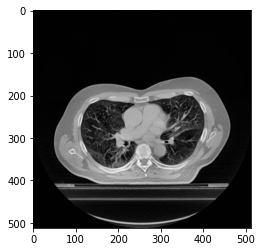

In [14]:
import numpy as np
import cv2
import pydicom as dicom
from skimage import exposure
import matplotlib.pyplot as plt

ds=dicom.dcmread('example.dcm')
dcm_sample=ds.pixel_array
dcm_sample1=exposure.equalize_adapthist(dcm_sample)

plt.imshow(dcm_sample1, cmap='gray')


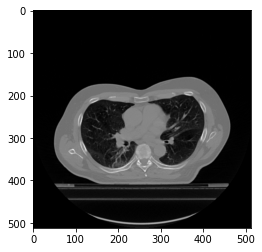

In [2]:
plt.imshow(dcm_sample, cmap='gray')

True

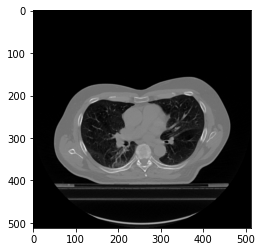

In [3]:
import numpy as np
import png
import pydicom

ds=dicom.dcmread('example.dcm')

shape = ds.pixel_array.shape

# Convert to float to avoid overflow or underflow losses.
image_2d = ds.pixel_array.astype(float)

# Rescaling grey scale between 0-255
image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

# Convert to uint
image_2d_scaled = np.uint8(image_2d_scaled)

plt.imshow(image_2d_scaled,cmap='gray')
cv2.imwrite("filename.png", image_2d_scaled)

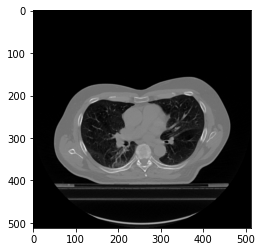

In [4]:
image_read = cv2.imread('filename.png')
image_gray = cv2.cvtColor(image_read,cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray,cmap='gray')

In [5]:
image_gray.shape

(512, 512)

In [6]:
dcm_sample.shape

(512, 512)

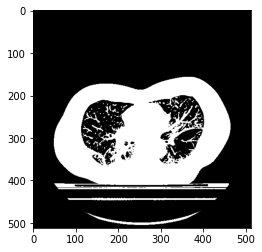

In [7]:
kernel = np.ones((7,7),np.uint8)
ret,th1 = cv2.threshold(image_gray,30,255,cv2.THRESH_BINARY)
#noise removal
image_closing = cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernel)
plt.imshow(th1,cmap='gray')

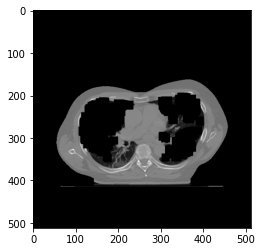

In [8]:
image = 'filename.png'
erosion = cv2.erode(image_closing,kernel,iterations=2)
without_skull = image_gray*(-erosion)

plt.imshow(without_skull,cmap='gray')

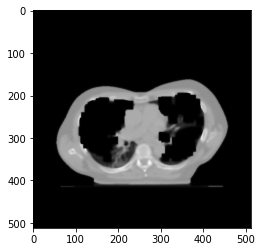

In [9]:
blur = cv2.bilateralFilter(without_skull,9,75,75)
plt.imshow(blur,cmap='gray')

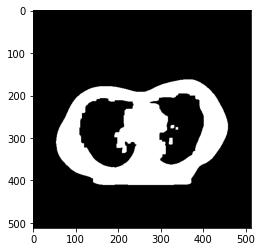

In [10]:
kernel1 = np.ones((5,5),np.uint8)
ret, th2 = cv2.threshold(blur,100,65,cv2.THRESH_BINARY)
#remove noise
no_noise = cv2.morphologyEx(th2,cv2.MORPH_DILATE,kernel1)

plt.imshow(no_noise,cmap='gray')

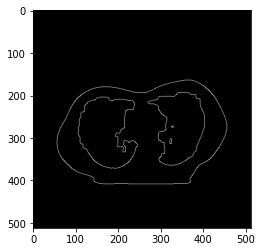

In [11]:
edges = cv2.Canny(th2,150,200)
plt.imshow(edges,cmap='gray')

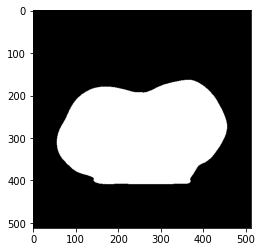

In [12]:
contours,hierarchy=cv2.findContours(edges,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
internal_contours = np.zeros(image_gray.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1: 
        cv2.drawContours(internal_contours,contours,i,255,-1)

plt.imshow(internal_contours,cmap='gray')

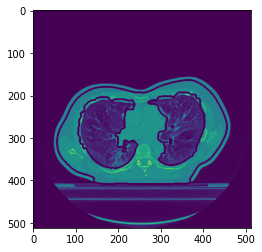

In [16]:
final_image = cv2.drawContours(image_gray,contours,-1,(0,255,0),3)
plt.imshow(final_image)

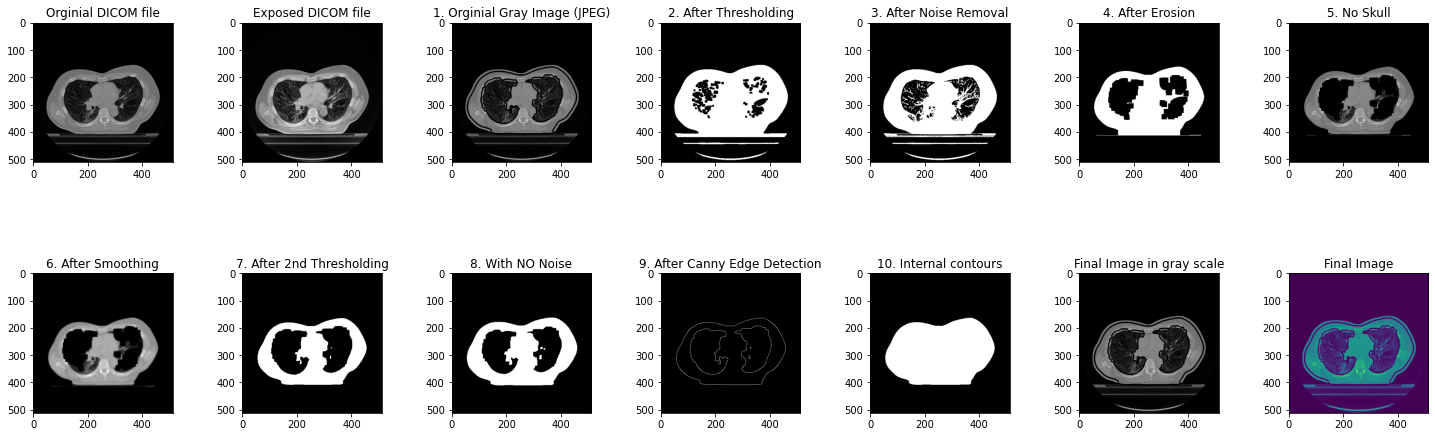

In [19]:
fig, axs = plt.subplots(2,7, figsize=(25, 9), facecolor='w', edgecolor='k');
fig.subplots_adjust(hspace = .05, wspace=.5);

axs = axs.ravel();

axs[0].imshow(dcm_sample, cmap='gray')
axs[0].set_title('Orginial DICOM file')
axs[1].imshow(dcm_sample1, cmap='gray')
axs[1].set_title('Exposed DICOM file')
axs[2].imshow(image_gray,'gray')
axs[2].set_title('1. Orginial Gray Image (JPEG)')
axs[3].imshow(image_closing,'gray')
axs[3].set_title('2. After Thresholding')
axs[4].imshow(th1,'gray')
axs[4].set_title('3. After Noise Removal')
axs[5].imshow(erosion,'gray')
axs[5].set_title('4. After Erosion')
axs[6].imshow(without_skull,'gray')
axs[6].set_title('5. No Skull')
axs[7].imshow(blur,'gray')
axs[7].set_title('6. After Smoothing')
axs[8].imshow(th2,'gray')
axs[8].set_title('7. After 2nd Thresholding')
axs[9].imshow(no_noise,'gray')
axs[9].set_title('8. With NO Noise')
axs[10].imshow(edges,'gray')
axs[10].set_title('9. After Canny Edge Detection')
axs[11].imshow(internal_contours,'gray')
axs[11].set_title('10. Internal contours')
axs[12].imshow(final_image,'gray')
axs[12].set_title('Final Image in gray scale')
axs[13].imshow(final_image)
axs[13].set_title('Final Image')

plt.savefig('IM_DICOM.jpeg')